In [1]:
RNN Recurrent Neural network : 순환 신경망
    음성인식, 문장변역에 사용
    embedding, simplernn 등
    순차데이터 텍스트, 시계열 등
    +
    

SyntaxError: invalid syntax (<ipython-input-1-880608218048>, line 1)

In [1]:
# 토큰 : 의미를 가진 기본적인 문자열, 문법적 최소단위
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

texts = ['You are the Best Thing', 'You are the Nice']
# num_words : 10개의 토큰 분리 
tokenizer = Tokenizer(num_words = 10, oov_token = '<OOV>') # oov 기존에 토큰화된 문자 없으면 대체되는값
#문장을 토큰화
# .fit_on_texts : texts 값을 토큰화함
tokenizer.fit_on_texts(texts)
# 텍스트 데이터를 정수 인덱스로 변환함
sequences = tokenizer.texts_to_sequences(texts)
# 이진형태 인코딩 함ㅎ
binary_results = tokenizer.sequences_to_matrix(sequences, mode = 'binary')
print(tokenizer.word_index) # 분석 결과 출력

{'<OOV>': 1, 'you': 2, 'are': 3, 'the': 4, 'best': 5, 'thing': 6, 'nice': 7}


In [2]:
print(sequences) # 정수로 변환

[[2, 3, 4, 5, 6], [2, 3, 4, 7]]


In [3]:
print(binary_results)  # 정수를 2진 형태 인코딩

[[0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 1. 0. 0.]]


In [4]:
test_text = ['You are the One']
test_seq = tokenizer.texts_to_sequences(test_text)
print(test_seq)

[[2, 3, 4, 1]]


In [22]:
# imdb 리뷰 5만개, 50% 긍정, 부정, 전처리 완료 : 내용이숫자화
from tensorflow.keras.datasets import imdb
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)
print(x_train.shape, x_test.shape)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

(25000,) (25000,)


In [23]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [24]:
igwi = {}
for key, value in imdb.get_word_index().items() :
    igwi[value] = key
for i in range(1, 6) :
    print('{}번째 가장 높은 빈도단어는 {}'.format(i, igwi[i]))

1번째 가장 높은 빈도단어는 the
2번째 가장 높은 빈도단어는 and
3번째 가장 높은 빈도단어는 a
4번째 가장 높은 빈도단어는 of
5번째 가장 높은 빈도단어는 to


In [25]:
print(y_train[:10])

[1 0 0 1 0 0 1 0 1 0]


In [26]:
import numpy as np
lengths = np.array([len(x) for x in x_train])
print(np.mean(lengths), np.median(lengths))


238.71364 178.0


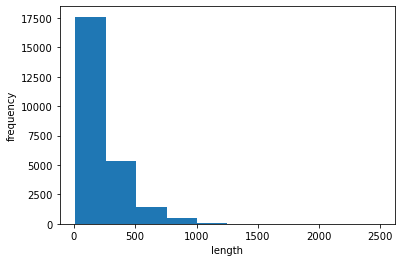

In [27]:
# 히스토그램으로 단어 갯수
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [28]:
# padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
a1 = [[1,2,3]]
a2 = [[1,2,3,4,5,6,7,8]]
a1_post = pad_sequences(a1, maxlen=5, padding = 'post')
a2_post = pad_sequences(a2, maxlen=5, padding = 'post')
print(a1_post)
print(a2_post)

[[1 2 3 0 0]]
[[4 5 6 7 8]]


In [29]:
# 분석을 위해 데이터의 길이를 통일하게 처리 : padding
# 패딩 : 데이터 길이기 지정 길이보다 짧으면 0으로 채움
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 500
print('befor pad', len(x_train[0])) # 218
# pre 앞쪽을 0으로
pad_x_train = pad_sequences(x_train, maxlen = max_len, padding = 'pre')
pad_x_test = pad_sequences(x_test, maxlen = max_len, padding = 'pre')
print('after pad', len(pad_x_train[0]))

befor pad 218
after pad 500


In [30]:
print('after pad',pad_x_train[0])

after pad [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0  

In [31]:
# embedding 층 : rnn 가장 기본층, 첫번째 층으로 사용됨
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
# input_dim 입력 데이터 차수
# output_dim 출력 차수
# input_length 입력데이터 갯수
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len)) 
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16001     
Total params: 336,001
Trainable params: 336,001
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(pad_x_train, y_train, batch_size = 32, epochs = 30, validation_split = 0.2)

Epoch 1/30
625/625 [==============================] - 2s 3ms/step - loss: 0.4643 - acc: 0.7681 - val_loss: 0.2965 - val_acc: 0.8802
Epoch 2/30
625/625 [==============================] - 2s 3ms/step - loss: 0.2000 - acc: 0.9270 - val_loss: 0.2833 - val_acc: 0.8820
Epoch 3/30
625/625 [==============================] - 2s 3ms/step - loss: 0.1091 - acc: 0.9686 - val_loss: 0.2893 - val_acc: 0.8850
Epoch 4/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0533 - acc: 0.9895 - val_loss: 0.3153 - val_acc: 0.8848
Epoch 5/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0249 - acc: 0.9975 - val_loss: 0.3459 - val_acc: 0.8792
Epoch 6/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0122 - acc: 0.9995 - val_loss: 0.3615 - val_acc: 0.8814
Epoch 7/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0067 - acc: 0.9998 - val_loss: 0.3851 - val_acc: 0.8820
Epoch 8/30
625/625 [==============================] - 2s 3ms/step - loss: 0.

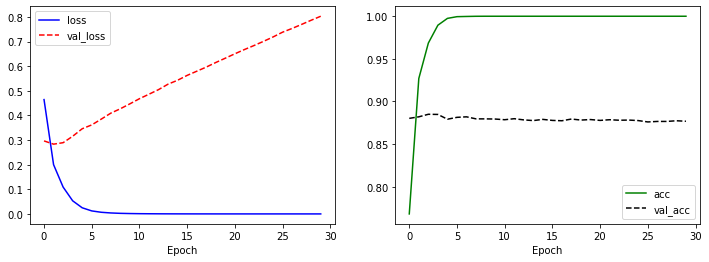

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'g-', label='acc')
plt.plot(history.history['val_acc'], 'k--', label='val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_generator)

In [16]:
# 평가

In [17]:
rnn
embedding 층은 데이터 표현을 학습하여 데이터 사전 구축하여 이해하는 정도
단어의 순서와 맥락까지 고려해야함 => embedding 층에서는 부족함
simple rnn 사용하기

SyntaxError: invalid syntax (<ipython-input-17-9625af8b9b13>, line 2)

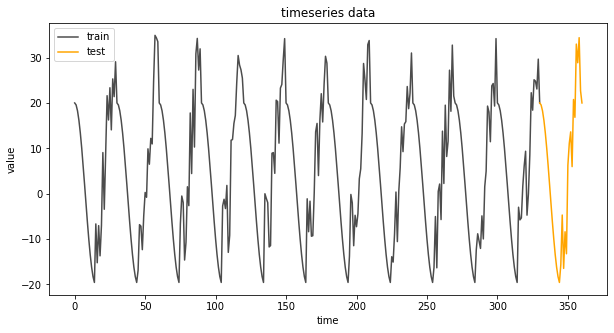

In [18]:
# cos 함수를 이용해 데이터 만들기
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2020)
time = np.arange(30*12+1)
month_time = (time%30)/30
time_series = 20*np.where(month_time < 0.5,
                         np.cos(2*np.pi*month_time),
                         np.cos(2*np.pi*month_time) +np.random.random(361))
plt.figure(figsize = (10, 5))
plt.title('timeseries data')
plt.xlabel('time')
plt.ylabel('value')
plt.plot(np.arange(0, 30*11+1), time_series[:30*11+1], color = 'black', alpha = 0.7, label = 'train')
plt.plot(np.arange(30*11, 30*12+1), time_series[30*11:], color = 'orange', label = 'test')
plt.legend()

In [19]:
def make_sequence(time_series, n) :
    x_train, y_train = list(), list()
    for i in range(len(time_series)) :
        x = time_series[i:(i+n)]
        if ( i + n ) < len(time_series) :
            x_train.append(x)
            y_train.append(time_series[i+n])
        else :
            break
    return np.array(x_train), np.array(y_train)
n = 10
x_train, y_train = make_sequence(time_series, n)
x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)
patial_x_train = x_train[:30*11]
patial_y_train = y_train[:30*11]
x_test = x_train[30*11:]
y_test = y_train[30*11:]
print("학습데이터", patial_x_train.shape, ",", patial_y_train.shape)
print("테스트데이터", x_test.shape, ",", y_test.shape)

학습데이터 (330, 10, 1) , (330, 1)
테스트데이터 (21, 10, 1) , (21, 1)


In [20]:
test_arr = np.arange(100)
a, b = make_sequence(test_arr, 10)
for i in range(1, 4) :
    print(a[i], '|', b[i])

[ 1  2  3  4  5  6  7  8  9 10] | 11
[ 2  3  4  5  6  7  8  9 10 11] | 12
[ 3  4  5  6  7  8  9 10 11 12] | 13


In [21]:
# simpleRNN
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(SimpleRNN(units = 32, activation = 'tanh', input_shape = (n, 1)))
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer = 'adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________
